<a href="https://colab.research.google.com/github/dstevvie/bda_project_hospital_readmission/blob/ds_workingbranch/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hospital Readmission Exploratory Analysis

In [1]:
import polars as pl
import altair as alt
import kagglehub
import os


In [2]:
# Download dataset
test_path = kagglehub.dataset_download("vanpatangan/readmission-dataset", path="test_df.csv")
train_path = kagglehub.dataset_download("vanpatangan/readmission-dataset", path="train_df.csv")

print(test_path)
print(train_path)


100%|██████████| 86.4k/86.4k [00:00<00:00, 8.46MB/s]


100%|██████████| 225k/225k [00:00<00:00, 33.0MB/s]

/root/.cache/kagglehub/datasets/vanpatangan/readmission-dataset/versions/1/test_df.csv
/root/.cache/kagglehub/datasets/vanpatangan/readmission-dataset/versions/1/train_df.csv


In [3]:
test_dataframe = pl.read_csv(test_path)
print(test_dataframe.head())

shape: (5, 7)
┌─────┬────────┬────────────────┬────────────────┬────────────────┬────────────────┬───────────────┐
│ age ┆ gender ┆ primary_diagno ┆ num_procedures ┆ days_in_hospit ┆ comorbidity_sc ┆ discharge_to  │
│ --- ┆ ---    ┆ sis            ┆ ---            ┆ al             ┆ ore            ┆ ---           │
│ i64 ┆ str    ┆ ---            ┆ i64            ┆ ---            ┆ ---            ┆ str           │
│     ┆        ┆ str            ┆                ┆ i64            ┆ i64            ┆               │
╞═════╪════════╪════════════════╪════════════════╪════════════════╪════════════════╪═══════════════╡
│ 52  ┆ Male   ┆ Heart Disease  ┆ 3              ┆ 9              ┆ 3              ┆ Home          │
│ 47  ┆ Female ┆ Diabetes       ┆ 2              ┆ 4              ┆ 0              ┆ Skilled       │
│     ┆        ┆                ┆                ┆                ┆                ┆ Nursing       │
│     ┆        ┆                ┆                ┆                ┆          

In [4]:
train_dataframe = pl.read_csv(train_path)
print(train_dataframe.head())

shape: (5, 8)
┌─────┬────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬────────────┐
│ age ┆ gender ┆ primary_diag ┆ num_procedu ┆ days_in_hos ┆ comorbidity ┆ discharge_t ┆ readmitted │
│ --- ┆ ---    ┆ nosis        ┆ res         ┆ pital       ┆ _score      ┆ o           ┆ ---        │
│ i64 ┆ str    ┆ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ i64        │
│     ┆        ┆ str          ┆ i64         ┆ i64         ┆ i64         ┆ str         ┆            │
╞═════╪════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪════════════╡
│ 69  ┆ Male   ┆ Heart        ┆ 1           ┆ 2           ┆ 1           ┆ Home Health ┆ 0          │
│     ┆        ┆ Disease      ┆             ┆             ┆             ┆ Care        ┆            │
│ 32  ┆ Female ┆ COPD         ┆ 2           ┆ 13          ┆ 2           ┆ Rehabilitat ┆ 0          │
│     ┆        ┆              ┆             ┆             ┆             ┆ ion

# Basic Descriptions of Training and Testing Data

In [5]:
train_dataframe.describe()

statistic,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
str,f64,str,str,f64,f64,f64,str,f64
"""count""",5000.0,"""5000""","""5000""",5000.0,5000.0,5000.0,"""5000""",5000.0
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0
"""mean""",53.299,null,null,4.461,7.3966,2.0686,null,0.188
"""std""",20.646851,null,null,2.88606,4.025587,1.422357,null,0.390751
"""min""",18.0,"""Female""","""COPD""",0.0,1.0,0.0,"""Home""",0.0
"""25%""",36.0,null,null,2.0,4.0,1.0,null,0.0
"""50%""",53.0,null,null,4.0,7.0,2.0,null,0.0
"""75%""",71.0,null,null,7.0,11.0,3.0,null,0.0
"""max""",89.0,"""Male""","""Kidney Disease""",9.0,14.0,4.0,"""Skilled Nursing Facility""",1.0


In [6]:
test_dataframe.describe()

statistic,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to
str,f64,str,str,f64,f64,f64,str
"""count""",2000.0,"""2000""","""2000""",2000.0,2000.0,2000.0,"""2000"""
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0"""
"""mean""",54.318,null,null,4.563,7.4195,2.053,null
"""std""",20.872631,null,null,2.846767,3.99944,1.40932,null
"""min""",18.0,"""Female""","""COPD""",0.0,1.0,0.0,"""Home"""
"""25%""",36.0,null,null,2.0,4.0,1.0,null
"""50%""",55.0,null,null,5.0,7.0,2.0,null
"""75%""",72.0,null,null,7.0,11.0,3.0,null
"""max""",89.0,"""Male""","""Kidney Disease""",9.0,14.0,4.0,"""Skilled Nursing Facility"""


In [12]:
import polars as pl

# Step 1: Replace "?" with None for categorical columns
train_dataframe = train_dataframe.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8) == "?")
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col, dtype in zip(train_dataframe.columns, train_dataframe.dtypes) if dtype == pl.Utf8
])

test_dataframe = test_dataframe.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8) == "?")
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col, dtype in zip(test_dataframe.columns, test_dataframe.dtypes) if dtype == pl.Utf8
])

# Step 2: Handle missing values for numerical columns
numerical_cols = [col for col, dtype in zip(train_dataframe.columns, train_dataframe.dtypes) if dtype in [pl.Float64, pl.Int64]]

for col in numerical_cols:
    if col in train_dataframe.columns and col in test_dataframe.columns:  # Check column existence
        train_median = train_dataframe.select(pl.col(col).median())[0, 0]  # Extract median
        test_median = test_dataframe.select(pl.col(col).median())[0, 0]    # Extract median
        train_dataframe = train_dataframe.with_columns(
            pl.col(col).fill_null(train_median).alias(col)
        )
        test_dataframe = test_dataframe.with_columns(
            pl.col(col).fill_null(test_median).alias(col)
        )
    else:
        print(f"Column {col} not found in one of the DataFrames.")
# Step 3: Handle missing values for categorical columns
categorical_cols = [col for col, dtype in zip(train_dataframe.columns, train_dataframe.dtypes) if dtype == pl.Utf8]

for col in categorical_cols:
    train_mode = train_dataframe[col].mode().to_list()[0]  # Get the mode
    test_mode = test_dataframe[col].mode().to_list()[0]  # Get the mode
    train_dataframe = train_dataframe.with_columns(
        pl.col(col).fill_null(train_mode).alias(col)
    )
    test_dataframe = test_dataframe.with_columns(
        pl.col(col).fill_null(test_mode).alias(col)
    )

# Step 4: Verify no missing values
print("Missing values in train_dataframe:\n", train_dataframe.null_count())
print("Missing values in test_dataframe:\n", test_dataframe.null_count())

Column readmitted not found in one of the DataFrames.
Missing values in train_dataframe:
 shape: (1, 8)
┌─────┬────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬────────────┐
│ age ┆ gender ┆ primary_diag ┆ num_procedu ┆ days_in_hos ┆ comorbidity ┆ discharge_t ┆ readmitted │
│ --- ┆ ---    ┆ nosis        ┆ res         ┆ pital       ┆ _score      ┆ o           ┆ ---        │
│ u32 ┆ u32    ┆ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ u32        │
│     ┆        ┆ u32          ┆ u32         ┆ u32         ┆ u32         ┆ u32         ┆            │
╞═════╪════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪════════════╡
│ 0   ┆ 0      ┆ 0            ┆ 0           ┆ 0           ┆ 0           ┆ 0           ┆ 0          │
└─────┴────────┴──────────────┴─────────────┴─────────────┴─────────────┴─────────────┴────────────┘
Missing values in test_dataframe:
 shape: (1, 7)
┌─────┬────────┬─────────────────┬─────

In [38]:
from sklearn.preprocessing import OneHotEncoder
import polars as pl
import numpy as np

# Convert Polars DataFrame to Pandas for One-Hot Encoding
train_df = train_dataframe.to_pandas()
test_df = test_dataframe.to_pandas()

# Identify categorical columns
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == "object"]

if categorical_cols:  # Check if there are categorical columns
    # One-Hot Encode categorical columns
    encoder = OneHotEncoder(handle_unknown='ignore')  # No sparse keyword
    train_encoded = encoder.fit_transform(train_df[categorical_cols]).toarray()  # Convert to dense array
    test_encoded = encoder.transform(test_df[categorical_cols]).toarray()  # Convert to dense array

    # Get encoded column names
    encoded_columns = encoder.get_feature_names_out(categorical_cols).tolist()

    # Create Polars DataFrames with proper column names
    train_encoded_df = pl.DataFrame(data=train_encoded, schema=encoded_columns)  # Specify column names directly
    test_encoded_df = pl.DataFrame(data=test_encoded, schema=encoded_columns)

    # Merge encoded features back into the original Polars DataFrames
    train_dataframe = pl.concat([train_dataframe.drop(categorical_cols), train_encoded_df], how="horizontal")
    test_dataframe = pl.concat([test_dataframe.drop(categorical_cols), test_encoded_df], how="horizontal")

    # Verify results
    print(train_dataframe.head())
    print(test_dataframe.head())
else:
    print("No categorical columns found for one-hot encoding.")

shape: (5, 16)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ age      ┆ num_proce ┆ days_in_h ┆ comorbidi ┆ … ┆ discharge ┆ discharge ┆ discharge ┆ discharge │
│ ---      ┆ dures     ┆ ospital   ┆ ty_score  ┆   ┆ _to_Home  ┆ _to_Home  ┆ _to_Rehab ┆ _to_Skill │
│ f64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ Health    ┆ ilitation ┆ ed        │
│          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ Care      ┆ Fa…       ┆ Nursing   │
│          ┆           ┆           ┆           ┆   ┆           ┆ ---       ┆ ---       ┆ F…        │
│          ┆           ┆           ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ ---       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64       │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.71831  ┆ 0.111111  ┆ 0.076923  ┆ 0.25      ┆ … ┆ 0.0       ┆ 1.0       ┆

In [39]:
X_train = train_dataframe.drop("readmitted")
y_train = train_dataframe["readmitted"]

X_test = test_dataframe

In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
# Predict readmission probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Predict readmission classes
y_pred = model.predict(X_test)

print("Predictions complete!")

Predictions complete!


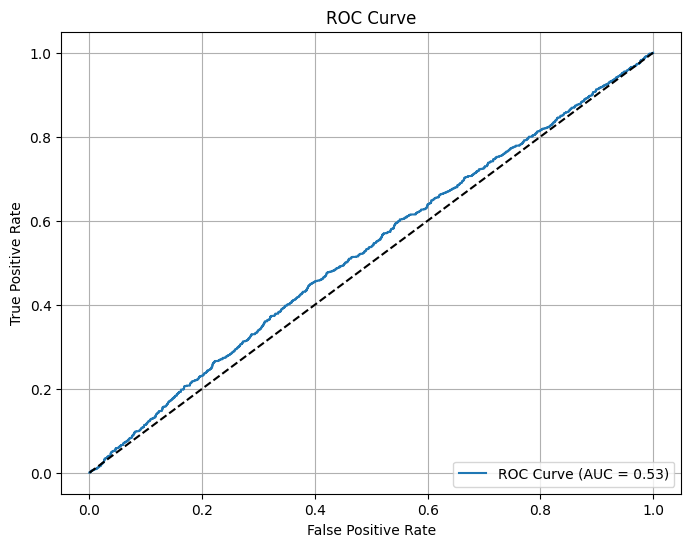

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Example for evaluation (if test labels exist)
# Replace `y_test` with actual labels if available
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting ROC Curve (optional, useful for binary classification)
fpr, tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])  # Use training for now
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()